In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split

# Configurações
IMG_SIZE = 128
BASE_DIR = '/content/drive/MyDrive/CattleImageRepository (1)'

def load_and_preprocess_data(base_dir, subdirs):
    X, y = [], []
    for subdir in subdirs:
        if subdir == 'G3/30-07/frames_juntos':
            # Todas as imagens estão na mesma pasta
            full_path = os.path.join(base_dir, subdir)
            x_files = sorted([f for f in os.listdir(full_path) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
            image_count = 0  # Contador de imagens

            for x_file in x_files:
                y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                if os.path.exists(os.path.join(full_path, y_file)):
                    img = cv2.imread(os.path.join(full_path, x_file))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    X.append(img)

                    mask = cv2.imread(os.path.join(full_path, y_file))
                    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                    y.append(mask)

                    image_count += 1

            print(f"{subdir}: {image_count} imagens processadas.")

        else:

            full_path = os.path.join(base_dir, *subdir.split('/'))
            x_dir = os.path.join(full_path, 'X')
            y_dir = os.path.join(full_path, 'Y')

            if not os.path.exists(y_dir):
                y_dir = os.path.join(full_path, 'y')

            if not os.path.exists(x_dir):
                x_dir = os.path.join(full_path, 'x1_files')
                y_dir = os.path.join(full_path, 'y1_files')

            if os.path.exists(x_dir) and os.path.exists(y_dir):
                x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                image_count = 0  # Contador de imagens

                for x_file in x_files:
                    y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                    if os.path.exists(os.path.join(y_dir, y_file)):
                        img = cv2.imread(os.path.join(x_dir, x_file))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        X.append(img)

                        mask = cv2.imread(os.path.join(y_dir, y_file))
                        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                        mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                        y.append(mask)

                        image_count += 1  # Incrementa o contador

                x_dir = os.path.join(full_path, 'x2_files')
                y_dir = os.path.join(full_path, 'y2_files')

                if os.path.exists(x_dir) and os.path.exists(y_dir):

                  x_files = sorted([f for f in os.listdir(x_dir) if f.endswith(('x.png', 'x1.png', 'x.jpeg', 'x1.jpeg'))])
                  image_count = 0  # Contador de imagens

                  for x_file in x_files:
                      y_file = x_file.replace('x.', 'y.').replace('x1.', 'y1.')
                      if os.path.exists(os.path.join(y_dir, y_file)):
                          img = cv2.imread(os.path.join(x_dir, x_file))
                          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                          img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                          X.append(img)

                          mask = cv2.imread(os.path.join(y_dir, y_file))
                          mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                          mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
                          y.append(mask)

                          image_count += 1  # Incrementa o contador

                print(f"{subdir}: {image_count} imagens processadas.")
            else:
                print(f"Erro: Pastas 'X' ou 'Y/y' não encontradas em {subdir}")

    return np.array(X), np.array(y)

# Lista de subdiretórios a serem processados
subdirs = [
    'G1/01-08-2024', 'G1/08-08-2024',
    'G2/29-07/00000000196000500', 'G2/29-07/00000000196000400',
    'G2/06-08/Video 1', 'G2/06-08/Video 2',
    'G3/30-07/frames_juntos', 'G3/30-07',
    'G4/02-08'
]

X, y = load_and_preprocess_data(BASE_DIR, subdirs)
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

G1/01-08-2024: 580 imagens processadas.
G1/08-08-2024: 137 imagens processadas.
G2/29-07/00000000196000500: 218 imagens processadas.
G2/29-07/00000000196000400: 219 imagens processadas.
G2/06-08/Video 1: 494 imagens processadas.
G2/06-08/Video 2: 63 imagens processadas.
G3/30-07/frames_juntos: 23 imagens processadas.
G3/30-07: 111 imagens processadas.
Erro: Pastas 'X' ou 'Y/y' não encontradas em G4/02-08


(128, 128, 3)


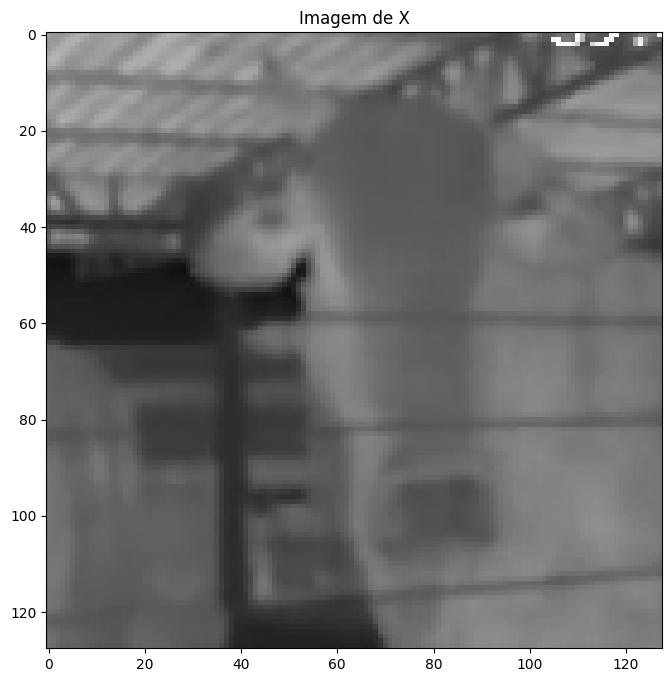

In [ ]:
import matplotlib.pyplot as plt

image = X[np.random.randint(0, X.shape[0])]

if image.shape[-1] == 1:
    image = image.squeeze()

print(image.shape)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f'Imagem de X')
plt.show()

In [ ]:
X.shape, y.shape

((2454, 128, 128, 3, 1), (2454, 128, 128, 3, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (1963, 128, 128, 3, 1)
Shape de X_test: (491, 128, 128, 3, 1)
Shape de y_train: (1963, 128, 128, 3, 1)
Shape de y_test: (491, 128, 128, 3, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

def apply_data_augmentation(X, y, variations=2):

    X_augmented = []
    y_augmented = []

    datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        brightness_range=[0.8, 1.2],
        channel_shift_range=50,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest'
    )

    for i in range(X.shape[0]):

        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        for j in range(variations):
            params = datagen.get_random_transform(image.shape)

            augmented_image = datagen.apply_transform(image, params)
            augmented_mask = datagen.apply_transform(mask, params)

            if augmented_image.max() > 1:
                augmented_image = augmented_image / 255.0

            if augmented_mask.max() > 1:
                augmented_mask = augmented_mask / 255.0

            # plt.imshow(augmented_image)
            # plt.axis('off')
            # plt.show()

            # plt.imshow(augmented_mask)
            # plt.axis('off')
            # plt.show()

            X_augmented.append(augmented_image)
            y_augmented.append(augmented_mask)

    return np.array(X_augmented), np.array(y_augmented)

X_train_augmented, y_train_augmented = apply_data_augmentation(X_train, y_train)

In [ ]:
X_train_augmented.shape, y_train_augmented.shape

((3926, 128, 128, 3), (3926, 128, 128, 3))

In [ ]:
def transform_dimensions(X, y, variations=3, normalize=False):
    X_transform = []
    y_transform = []

    for i in range(X.shape[0]):
        image = X[i]
        mask = y[i]

        if image.ndim == 4:
            image = image.squeeze()
        if mask.ndim == 4:
            mask = mask.squeeze()

        if normalize:
          image = image / 255.0
          mask = mask / 255.0

        X_transform.append(image)
        y_transform.append(mask)

    return np.array(X_transform), np.array(y_transform)

X_train_transformed, y_train_transformed = transform_dimensions(X_train_augmented, y_train_augmented)
X_test_transformed, y_teste_transformed = transform_dimensions(X_test, y_test)

In [ ]:
X_train_augmented = np.concatenate((X_train_transformed, X_train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train_transformed, y_train_augmented), axis=0)

In [136]:
X_test_transformed_2 = X_test_transformed / 255.0
y_teste_transformed_2 = y_teste_transformed / 255.0

(-0.5, 127.5, 127.5, -0.5)

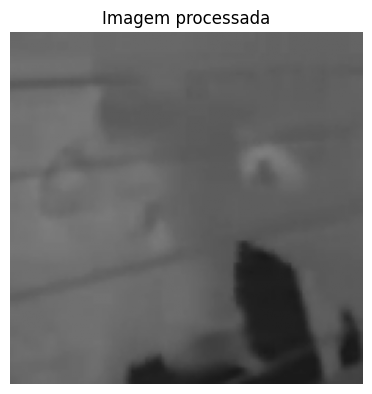

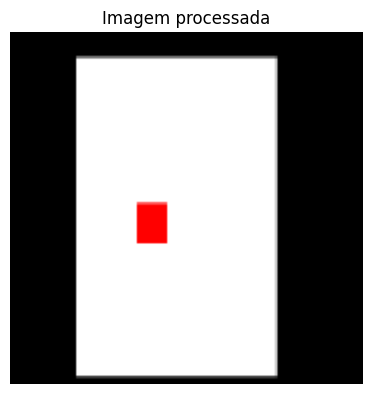

In [138]:
index = np.random.randint(0, X_test.shape[0])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_test_transformed_2[index])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed_2[index])
plt.title("Imagem processada")
plt.axis('off')

In [141]:
X_train_augmented.shape, y_train_augmented.shape

((7852, 128, 128, 3), (7852, 128, 128, 3))

In [140]:
X_test_transformed_2.shape, y_teste_transformed_2.shape

((491, 128, 128, 3), (491, 128, 128, 3))

In [97]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, concatenate
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras import backend as K

# Set random seed for reproducibility
tf.random.set_seed(123)

# Load the VGG16 model pre-trained on ImageNet without the top layer
vgg16_base = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

# Access the output of the VGG16 model
output_ = vgg16_base.output

# Set trainable layers based on specific conditions
set_trainable = False
for layer in vgg16_base.layers:
    if layer.name in ['block1_conv1']:
        set_trainable = True
    if layer.name in ['block1_pool', 'block2_pool', 'block3_pool', 'block4_pool', 'block5_pool']:
        layer.trainable = False

# Create a new model based on the VGG16 model's input and output
vgg_model = Model(inputs=vgg16_base.input, outputs=output_)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]

# Display layers information in a DataFrame
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

# Display the summary of the VGG model
vgg_model.summary()

# Clear the Keras session to free memory
K.clear_session()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [100]:
vgg_model = Model(inputs=vgg16_base.input, outputs=output_)

def ModelEnhancer():
    input_shape = (128, 128, 3)
    VGG16_weight = vgg_model.get_weights()
    vgg_base = VGG16(include_top=False, weights=None, input_shape=input_shape)
    vgg_base.set_weights(VGG16_weight)
    last_layer = vgg_base.output

    set_trainable = False
    for layer in vgg_base.layers:
        if layer.name in ['block1_conv1']:
            set_trainable = True
        if layer.name in ['block1_pool', 'block2_pool', 'block3_pool', 'block4_pool', 'block5_pool']:
            layer.trainable = False

    # Upsampling path
    model_ = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(last_layer)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    # Ensure shapes match before concatenation
    block5_output = vgg_base.get_layer("block5_conv3").output
    if K.int_shape(model_)[1:3] != K.int_shape(block5_output)[1:3]:
        block5_output = Cropping2D(cropping=((1, 1), (1, 1)))(block5_output)
    concat_1 = concatenate([model_, block5_output])

    model_ = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(concat_1)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    model_ = Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    # Ensure shapes match before concatenation
    block4_output = vgg_base.get_layer("block4_conv3").output
    if K.int_shape(model_)[1:3] != K.int_shape(block4_output)[1:3]:
        block4_output = Cropping2D(cropping=((1, 1), (1, 1)))(block4_output)
    concat_2 = concatenate([model_, block4_output])

    model_ = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(concat_2)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    model_ = Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    # Ensure shapes match before concatenation
    block3_output = vgg_base.get_layer("block3_conv3").output
    if K.int_shape(model_)[1:3] != K.int_shape(block3_output)[1:3]:
        block3_output = Cropping2D(cropping=((1, 1), (1, 1)))(block3_output)
    concat_3 = concatenate([model_, block3_output])

    model_ = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(concat_3)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    model_ = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    # Ensure shapes match before concatenation
    block2_output = vgg_base.get_layer("block2_conv2").output
    if K.int_shape(model_)[1:3] != K.int_shape(block2_output)[1:3]:
        block2_output = Cropping2D(cropping=((1, 1), (1, 1)))(block2_output)
    concat_4 = concatenate([model_, block2_output])

    model_ = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(concat_4)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    model_ = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    # Ensure shapes match before concatenation
    block1_output = vgg_base.get_layer("block1_conv2").output
    if K.int_shape(model_)[1:3] != K.int_shape(block1_output)[1:3]:
        block1_output = Cropping2D(cropping=((1, 1), (1, 1)))(block1_output)
    concat_5 = concatenate([model_, block1_output])

    model_ = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(concat_5)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    model_ = Conv2D(3, (3, 3), strides=(1, 1), padding='same')(model_)
    model_ = LeakyReLU(0.1)(model_)
    model_ = BatchNormalization()(model_)

    model_ = Model(vgg_base.input, model_)

    return model_

In [101]:
enhanced_model = ModelEnhancer()

# Display the summary of the enhanced model
enhanced_model.summary()

# Compile the model
enhanced_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 128, 128, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

In [179]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = enhanced_model.fit(
    X_train_augmented, y_train_augmented,
    validation_data=(X_test_transformed_2, y_teste_transformed_2),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint, early_stop]
)

# Save the final model
enhanced_model.save('final_model.h5')

Epoch 1/10
246/246 [==============================] - ETA: 0s - loss: 0.7417 - accuracy: 0.4232

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


246/246 [==============================] - 1289s 5s/step - loss: 0.7417 - accuracy: 0.4232 - val_loss: 0.6310 - val_accuracy: 0.7319
Epoch 2/10
246/246 [==============================] - 1285s 5s/step - loss: 0.7107 - accuracy: 0.4833 - val_loss: 0.5752 - val_accuracy: 0.2414
Epoch 3/10
246/246 [==============================] - 1289s 5s/step - loss: 0.6987 - accuracy: 0.4800 - val_loss: 0.5757 - val_accuracy: 0.6649
Epoch 4/10
246/246 [==============================] - 1297s 5s/step - loss: 0.6847 - accuracy: 0.4740 - val_loss: 0.7705 - val_accuracy: 0.0457
Epoch 5/10
246/246 [==============================] - 1300s 5s/step - loss: 0.6701 - accuracy: 0.4425 - val_loss: 0.4925 - val_accuracy: 0.5985
Epoch 6/10
246/246 [==============================] - 1291s 5s/step - loss: 0.6724 - accuracy: 0.4623 - val_loss: 0.5000 - val_accuracy: 0.5949
Epoch 7/10
246/246 [==============================] - 1295s 5s/step - loss: 0.6404 - accuracy: 0.4688 - val_loss: 0.4688 - val_accuracy: 0.5723
Epo

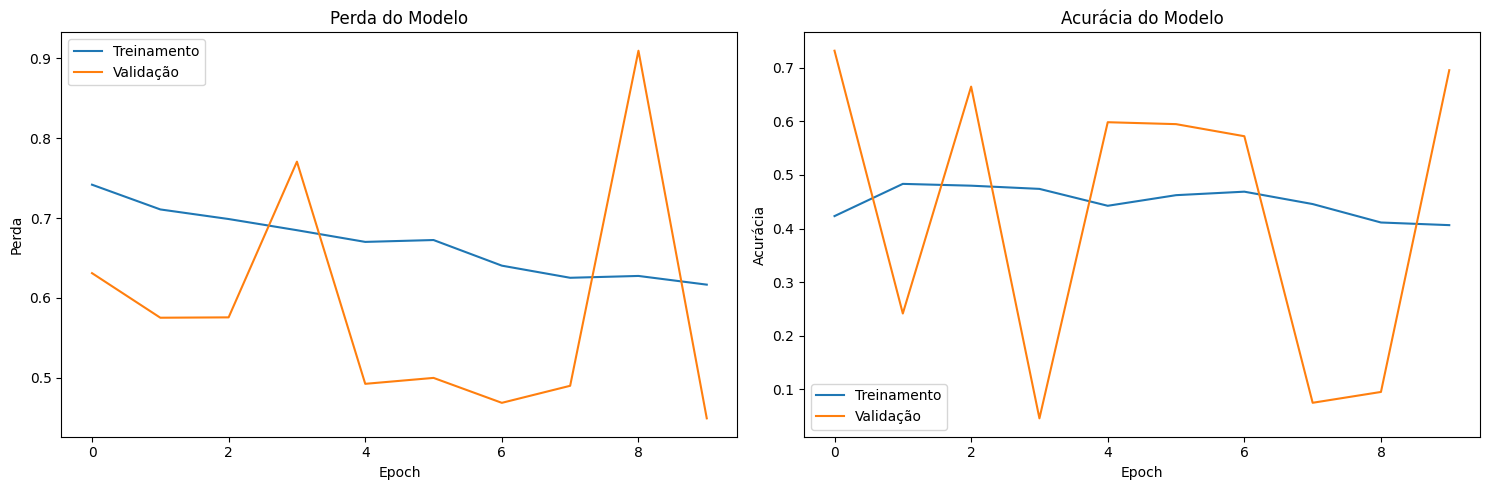

In [180]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Lista de métricas para plotar
    metrics = ['loss', 'accuracy']
    if 'val_loss' in history.history:
        metrics.extend(['val_loss', 'val_accuracy'])

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot de perda
    axs[0].plot(history.history['loss'], label='Treinamento')
    if 'val_loss' in history.history:
        axs[0].plot(history.history['val_loss'], label='Validação')
    axs[0].set_title('Perda do Modelo')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Perda')
    axs[0].legend()

    # Plot de acurácia
    axs[1].plot(history.history['accuracy'], label='Treinamento')
    if 'val_accuracy' in history.history:
        axs[1].plot(history.history['val_accuracy'], label='Validação')
    axs[1].set_title('Acurácia do Modelo')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Acurácia')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [181]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the best model (you can also use 'final_model.h5' if you prefer)
model = load_model('final_model.h5')

# Make predictions
predictions = model.predict(X_test_transformed_2)

16/16 [==============================] - 20s 1s/step


In [183]:
predictions.shape

(491, 128, 128, 3)

(-0.5, 127.5, 127.5, -0.5)

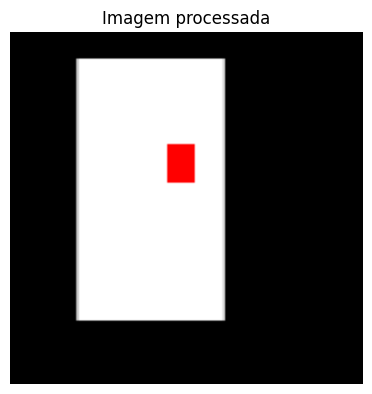

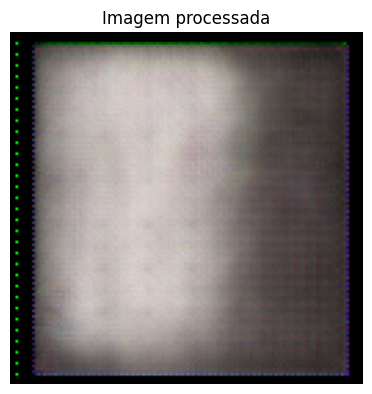

In [184]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_teste_transformed_2[0])
plt.title("Imagem processada")
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(predictions[0])
plt.title("Imagem processada")
plt.axis('off')

Sample 1:


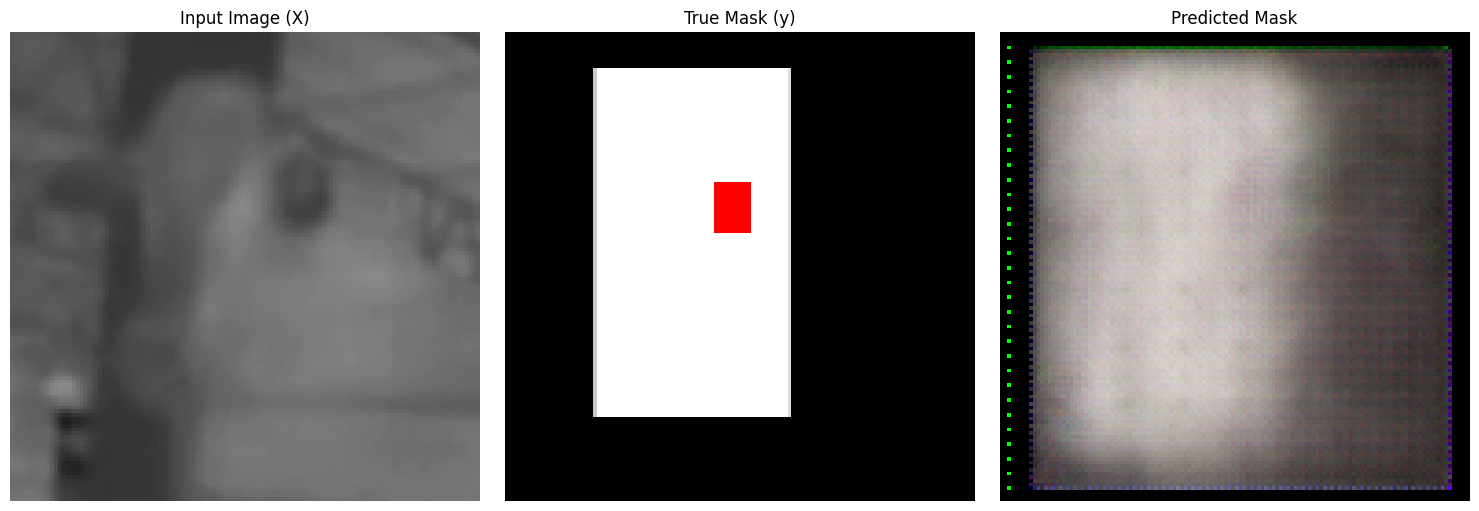



Sample 2:


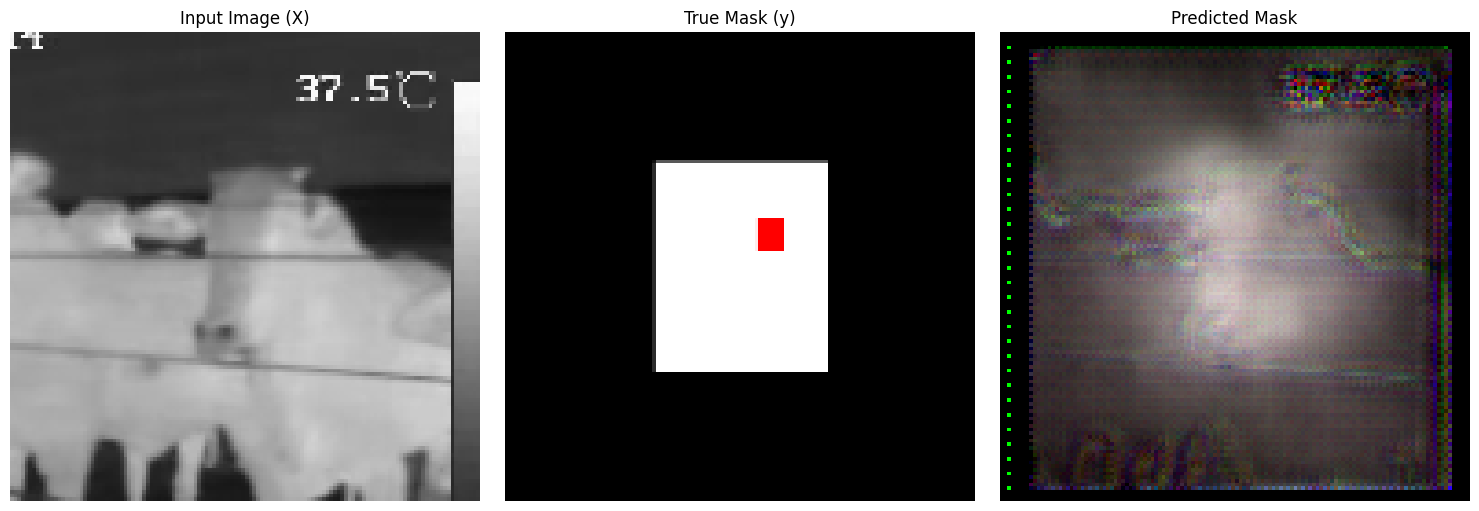



Sample 3:


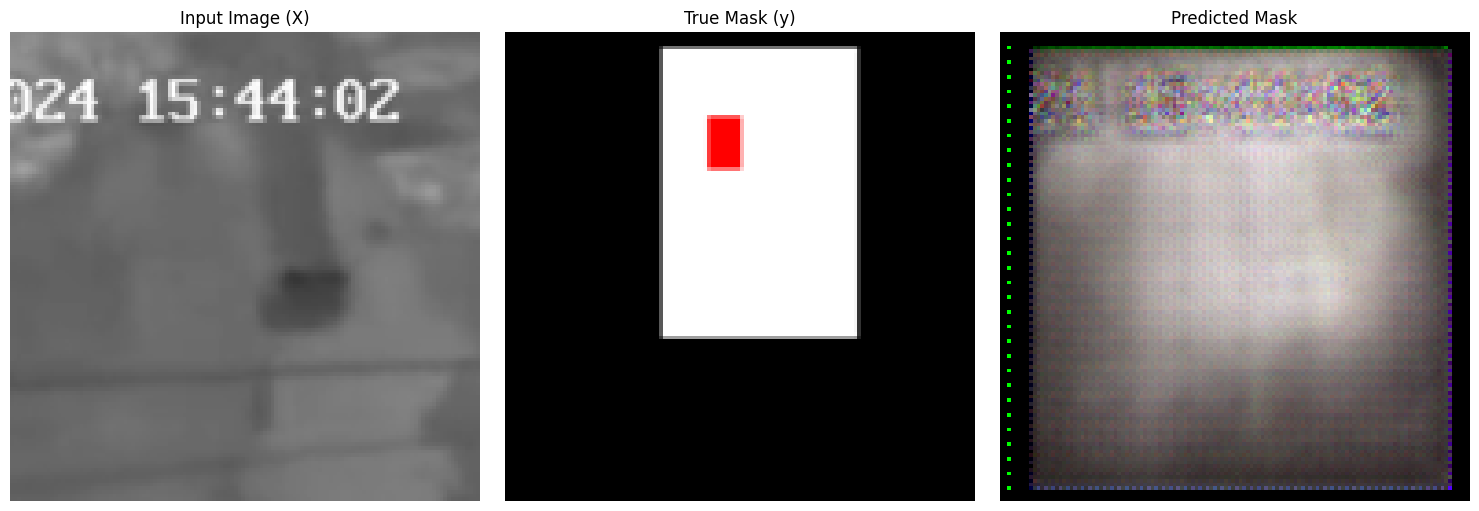



Sample 4:


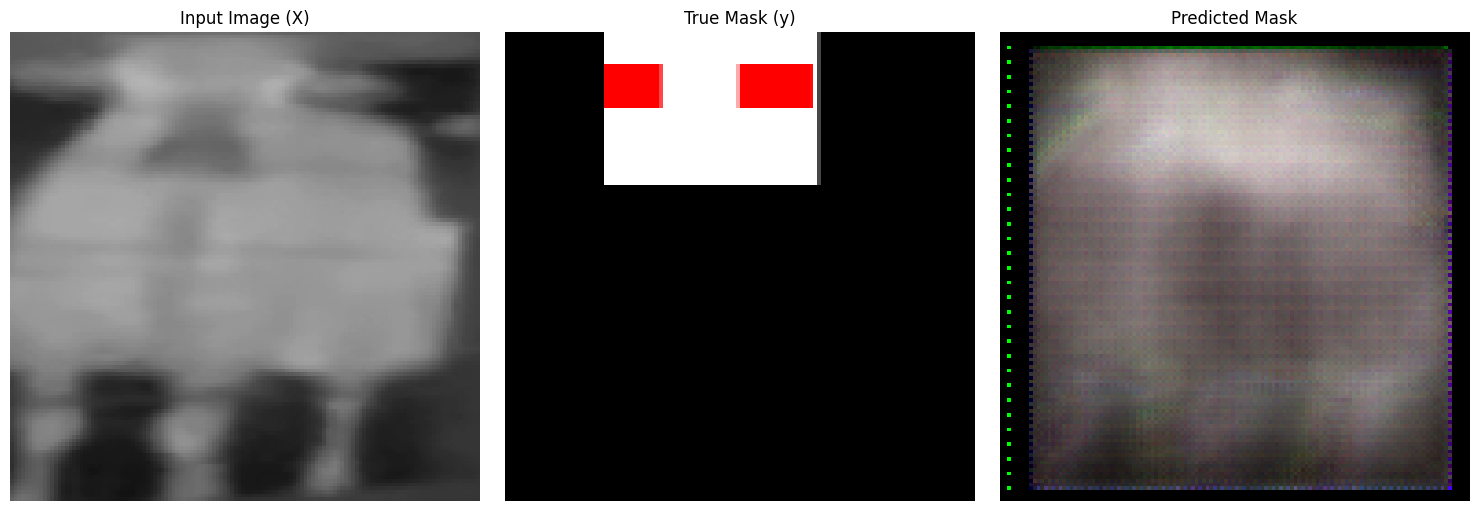



Sample 5:


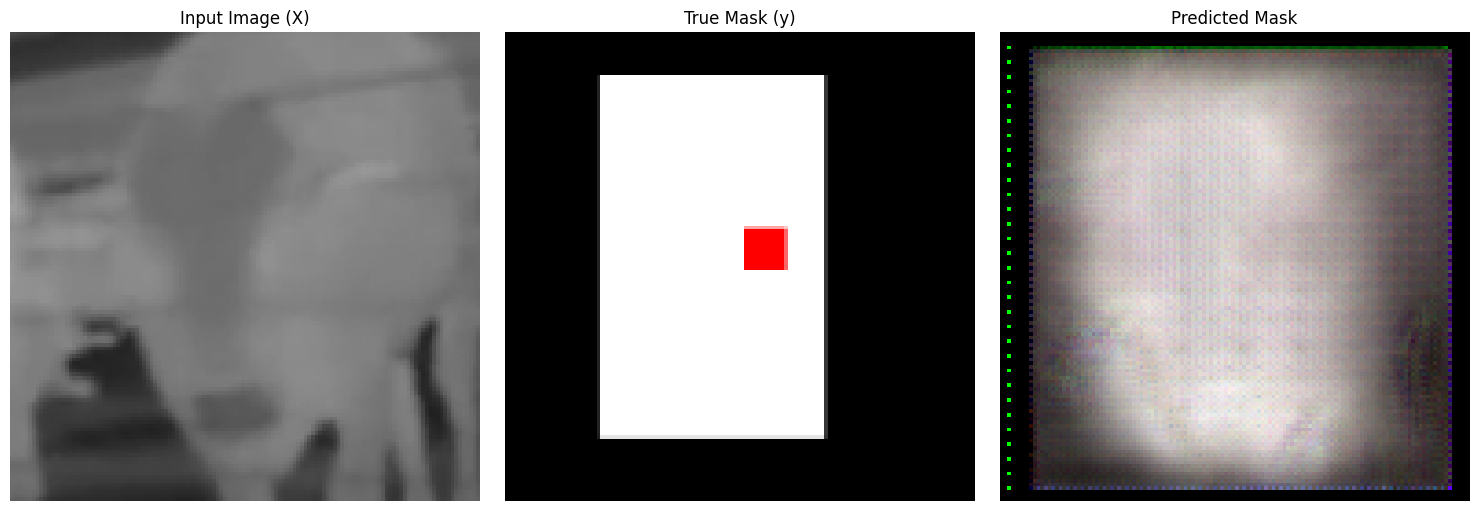

In [191]:
binary_predictions = predictions

def plot_sample(X, y, pred, index):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.imshow(X[index])
    ax1.set_title('Input Image (X)')
    ax1.axis('off')

    ax2.imshow(y[index])
    ax2.set_title('True Mask (y)')
    ax2.axis('off')

    ax3.imshow(pred[index])
    ax3.set_title('Predicted Mask')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize several samples
num_samples = 5
for i in range(num_samples):
    print(f"Sample {i+1}:")
    plot_sample(X_test_transformed, y_teste_transformed, binary_predictions, i)
    print("\n")  # Add a newline for better separation between samples